In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes  
from kmodes.kmodes import KModes

In [19]:
df = pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [20]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [21]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [22]:
df_temp = df[['ID', 'Age', 'Income']]

In [23]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [24]:
df = df.drop(['ID'], axis=1)

In [25]:
mark_array = df.values

mark_array[:,2] = mark_array[:,2].astype(float)
mark_array[:,4] = mark_array[:,4].astype(float)

In [26]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [27]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0,1,3,5,6])

print(kproto.cluster_centroids_)

len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 738, ncost: 184.31421258191355
Run: 1, iteration: 2/20, moves: 183, ncost: 176.38781944484566
Run: 1, iteration: 3/20, moves: 184, ncost: 172.28707871962712
Run: 1, iteration: 4/20, moves: 55, ncost: 172.10178682386993
Run: 1, iteration: 5/20, moves: 10, ncost: 172.08994424370562
Run: 1, iteration: 6/20, moves: 6, ncost: 172.08425930847403
Run: 1, iteration: 7/20, moves: 8, ncost: 172.08059137991543
Run: 1, iteration: 8/20, moves: 6, ncost: 172.07728602399214
Run: 1, iteration: 9/20, moves: 0, ncost: 172.07728602399214
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 861, ncost: 160.3962350104188
Run: 2, iteration: 2/20, moves: 169, ncost: 159.68852603051155
Run: 2, iteration: 3/20, moves: 19, ncost: 159.64935456260102
Run: 2, iteration: 4

10

In [28]:
cluster_dict=[]

for c in clusters:
    cluster_dict.append(c)

df['cluster'] = cluster_dict

df[['ID', 'Age', 'Income']] = df_temp

In [29]:
df[df['cluster']==0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
23,0,0,44,1,134918,1,2,0,100000024
46,0,0,39,1,140182,1,0,0,100000047
68,0,0,37,1,106978,1,2,0,100000069
72,0,0,51,1,141858,2,2,0,100000073
74,0,0,40,1,140888,2,2,0,100000075
77,0,0,51,1,155486,1,2,0,100000078
94,0,0,54,1,165230,1,2,0,100000095
97,0,0,34,1,134794,1,2,0,100000098
99,0,0,36,1,195465,2,2,0,100000100
105,0,0,39,1,244716,2,2,0,100000106


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


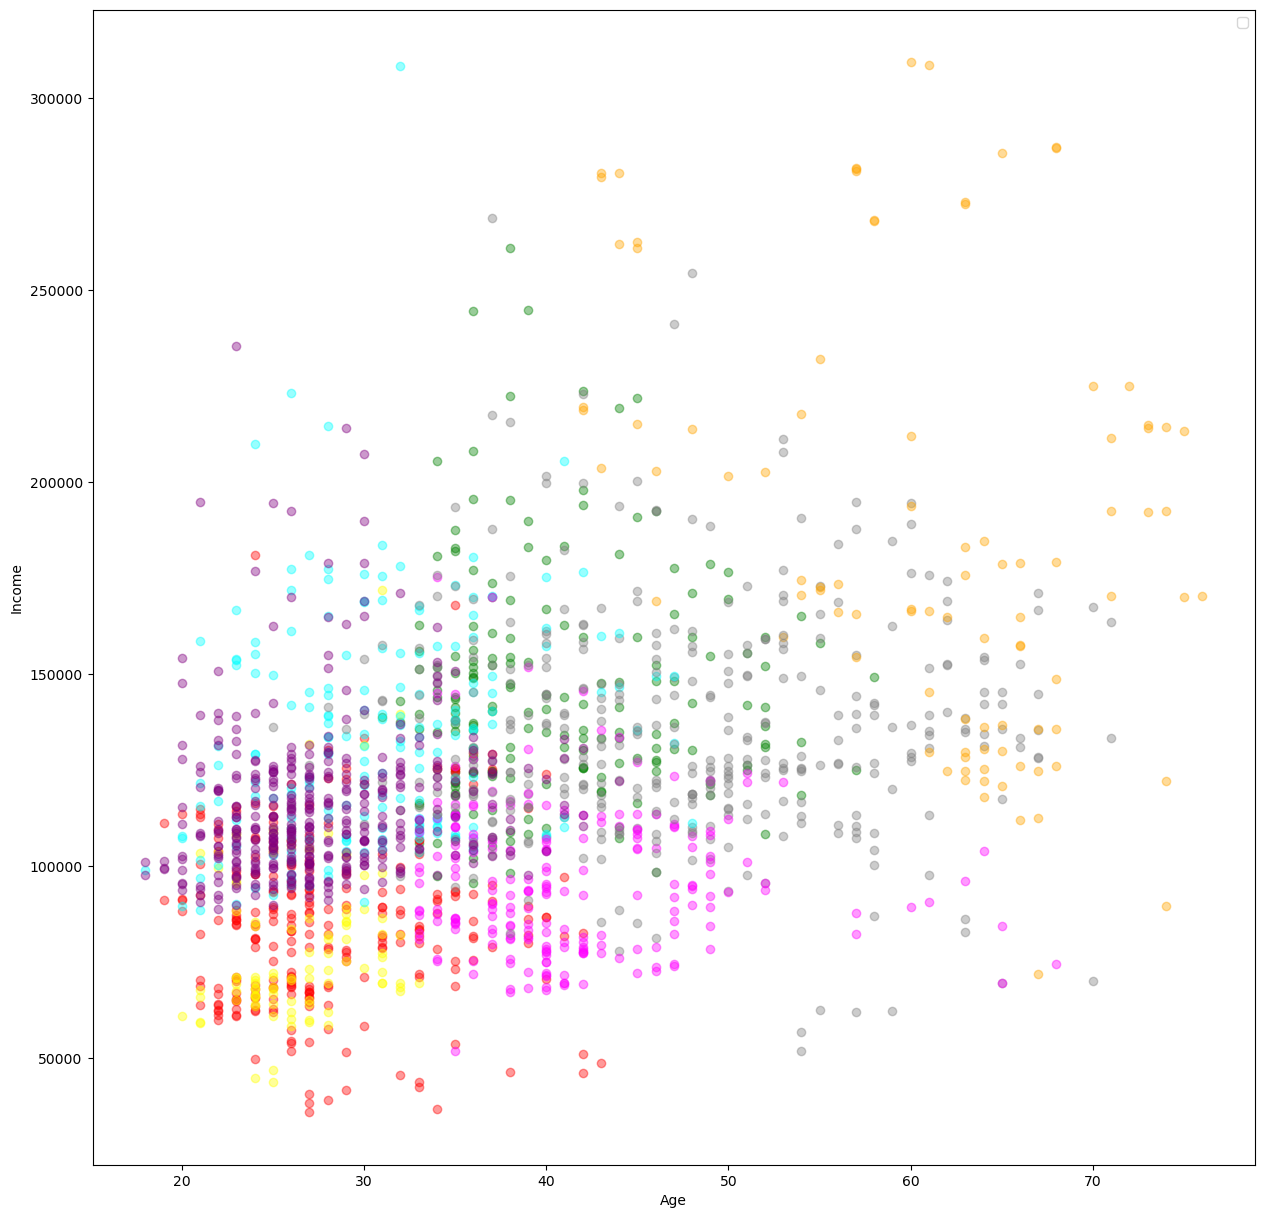

In [30]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==6]
df7 = df[df.cluster==7]
df8 = df[df.cluster==8]
df9 = df[df.cluster==9]
df10 = df[df.cluster==10]


plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'],color='green', alpha = 0.4)
plt.scatter(df2.Age, df2['Income'],color='red', alpha = 0.4)
plt.scatter(df3.Age, df3['Income'],color='gray', alpha = 0.4)
plt.scatter(df4.Age, df4['Income'],color='orange', alpha = 0.4)
plt.scatter(df5.Age, df5['Income'],color='yellow', alpha = 0.4)
plt.scatter(df6.Age, df6['Income'],color='cyan', alpha = 0.4)
plt.scatter(df7.Age, df7['Income'],color='magenta', alpha = 0.4)
plt.scatter(df8.Age, df8['Income'],color='gray', alpha = 0.4)
plt.scatter(df9.Age, df9['Income'],color='purple', alpha = 0.4)
plt.scatter(df10.Age, df10['Income'],color='blue', alpha = 0.4)

plt.legend()
plt.show()